<center>
<a href="http://www.insa-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo-insa.jpg" style="float:left; max-width: 120px; display: inline" alt="INSA"/></a> 

<a href="http://wikistat.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/wikistat.jpg" style="max-width: 250px; display: inline"  alt="Wikistat"/></a>

<a href="http://www.math.univ-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo_imt.jpg" style="float:right; max-width: 250px; display: inline" alt="IMT"/> </a>
</center>

#  Part 1 : Get started with the PyWavelet library for 1D signals 

## Wavelet bases

In [1]:
import pywt
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pywt.families()

['haar',
 'db',
 'sym',
 'coif',
 'bior',
 'rbio',
 'dmey',
 'gaus',
 'mexh',
 'morl',
 'cgau',
 'shan',
 'fbsp',
 'cmor']

In [3]:
pywt.families(short=False)

['Haar',
 'Daubechies',
 'Symlets',
 'Coiflets',
 'Biorthogonal',
 'Reverse biorthogonal',
 'Discrete Meyer (FIR Approximation)',
 'Gaussian',
 'Mexican hat wavelet',
 'Morlet wavelet',
 'Complex Gaussian wavelets',
 'Shannon wavelets',
 'Frequency B-Spline wavelets',
 'Complex Morlet wavelets']

In [4]:
pywt.wavelist(family='db')


['db1',
 'db2',
 'db3',
 'db4',
 'db5',
 'db6',
 'db7',
 'db8',
 'db9',
 'db10',
 'db11',
 'db12',
 'db13',
 'db14',
 'db15',
 'db16',
 'db17',
 'db18',
 'db19',
 'db20',
 'db21',
 'db22',
 'db23',
 'db24',
 'db25',
 'db26',
 'db27',
 'db28',
 'db29',
 'db30',
 'db31',
 'db32',
 'db33',
 'db34',
 'db35',
 'db36',
 'db37',
 'db38']

In [5]:
pywt.wavelist(kind='continuous')

['cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor',
 'fbsp',
 'gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'mexh',
 'morl',
 'shan']

In [6]:
haarwavelet = pywt.Wavelet('haar')
print(haarwavelet)

Wavelet haar
  Family name:    Haar
  Short name:     haar
  Filters length: 2
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       asymmetric
  DWT:            True
  CWT:            False


In [7]:
wavelet = pywt.Wavelet('db1')

In [8]:
print(wavelet)

Wavelet db1
  Family name:    Daubechies
  Short name:     db
  Filters length: 2
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       asymmetric
  DWT:            True
  CWT:            False


Definition of the scaling and wavelet functions

[0. 1. 1. 0.]
[ 0.  1. -1.  0.]
[0.  0.5 1.  1.5]


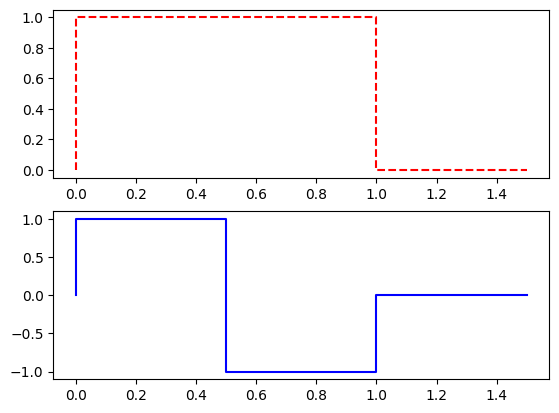

In [9]:
wavelet = pywt.Wavelet('haar')
phi, psi, x = wavelet.wavefun(level=1)
print (phi)
print(psi)
print(x)
plt.figure(2)
plt.subplot(211)
plt.step(x,phi,'r--')
plt.subplot(212)
plt.step(x,psi,'b-')
plt.show()

[ 0.          0.02763215 -0.0298425  -0.24795136  0.02347892  0.89658165
  1.02305297  0.2819907  -0.05534419  0.04174686  0.0386548   0.
  0.          0.          0.          0.          0.          0.
  0.        ]
[ 0.          0.0386548  -0.04174686 -0.05534419 -0.2819907   1.02305297
 -0.89658165  0.02347892  0.24795136 -0.0298425  -0.02763215  0.
  0.          0.          0.          0.          0.          0.
  0.        ]
[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5
 9. ]


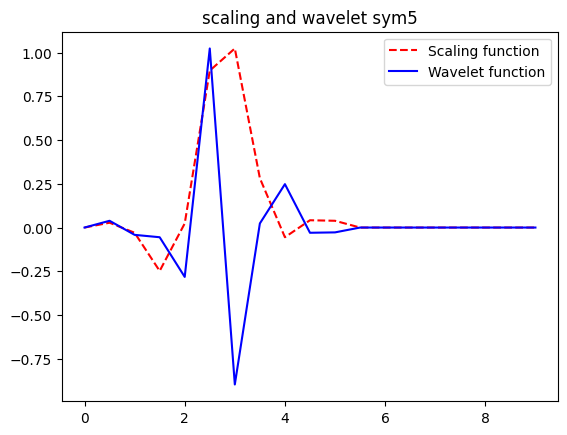

In [10]:
wavelet = pywt.Wavelet('sym5')
phi, psi, x = wavelet.wavefun(level=1)
print (phi)
print(psi)
print(x)
p1,=plt.plot(x,phi,'r--')
p2,=plt.plot(x,psi,'b-')
plt.title("scaling and wavelet sym5")
plt.legend([p1, p2], ['Scaling function', 'Wavelet function'])
plt.show()
# Increase the level value

## Wavelet decomposition : wavelet transform


### Single level discrete wavelet transform

With the function pywt.dwt, we obtain at output 2 vectors of coefficients of the same size, calculated at the maximum possible level according to the size of the input data:
- the  approximation (or scale) coefficients  and
- the detail (or wavelets) coefficients. 

Avec la fonction pywt.dwt, on obtient en sortie 2 vecteurs de coefficients de même taille, calculés au niveau maximal possible en fonction de la taille des données d'entrée: 
 - les coefficients d'approximation (ou d'échelle) et
 - les coefficients de détail (ou d'ondelettes)  

In [11]:
(cA, cD) = pywt.dwt([1, 2, 3, 4, 5,6,7,8], 'db1')
(cA1, cD1) = pywt.dwt([8,7, 6, 5, 4, 3, 2, 1], 'db1')
#  Approximation (or scale) coefficients 
print(cA)
# Detail (or wavelets) coefficients
print(cD)
# For a signal of size n, we obtain n / 2 (approximately) scaling coefficients and n / 2 wavelet coefficients
print(cA1)
print(cD1)


[ 2.12132034  4.94974747  7.77817459 10.60660172]
[-0.70710678 -0.70710678 -0.70710678 -0.70710678]
[10.60660172  7.77817459  4.94974747  2.12132034]
[0.70710678 0.70710678 0.70710678 0.70710678]


**Q. ** Recover these results with the definition of the Haar basis

### Multi-level decomposition


With the function **wavedec**, we can specify the desired level, we obtain at the output several vectors of coefficients :
  - the approximation coefficients (or scale) at the requested level
  - the detail coefficients (or wavelet) at all the higher levels, up to the maximum level.
  
If the value of the level is $ L $, at the output, we get the vectors cAL, cDL, .. cD1, where cD1 is the vector of the detail coefficients at the finest possible level.
 
 This corresponds to the following decomposition:
 
  $$ f(x)=\sum_{ k \in \Lambda( j_0)} \alpha_{j_0,k}\phi_{j_0,k} + \sum_{j = j_0}^{J_{max}}\sum_{k  \in \Lambda( j)} \beta_{j,k} \psi_{j,k},$$
 
  with $j_0=J_{max} +1-L$
 
- It will be useful to use this decomposition to apply a threshold on the wavelet coefficients $ \beta_{j, k} $ for $ j \geq j_0 $. 
  
-------------------------------------

Avec la fonction **wavedec**, on peut préciser le niveau souhaité (level); on obtient en sortie plusieurs vecteurs de coefficients  :
 - les coefficients d'approximation (ou d'échelle) au niveau demandé
 - les coefficients de détail (ou d'ondelettes) à tous les niveaux supérieurs, jusqu'au niveau maximal. 
 
Si la valeur du niveau est $L$, en sortie, on récupère les vecteurs cAL, cDL, .. cD1, où cD1 est le vecteur des coefficient de détail au niveau le plus fin possible. 
 
Ceci correspond à la décomposition suivante : 
 
 $$ f(x)=\sum_{ k \in \Lambda( j_0)} \alpha_{j_0,k}\phi_{j_0,k} + \sum_{j = j_0}^{J_{max}}\sum_{k  \in \Lambda( j)} \beta_{j,k} \psi_{j,k},$$
 
 avec $j_0=J_{max} +1-L$
 
- Il sera utile d'utiliser cette décomposition pour appliquer un seuillage sur les coefficients de détails $\beta_{j,k} $  pour  $ j \geq j_0$. 

In [15]:
1/np.sqrt(2)*(1)

5.65685424949238

In [20]:
from pywt import wavedec

coeffs = wavedec([1,2,3,4,5,6,7,8], 'db1',level=1)

#print(coeffs[0].shape)
#detail=coeffs[-1]
#print(detail)

print(coeffs)

[array([ 2.12132034,  4.94974747,  7.77817459, 10.60660172]), array([-0.70710678, -0.70710678, -0.70710678, -0.70710678])]


**Q. ** Recover these results with the definition of the Haar basis

In [72]:
from pywt import wavedec

coeffs = wavedec([1,2,3,4,5,6,7,8], 'db1', level=3)
print(coeffs)

[array([12.72792206]), array([-5.65685425]), array([-2., -2.]), array([-0.70710678, -0.70710678, -0.70710678, -0.70710678])]


### Maximal level for the decomposition




Allows you to know at which maximum level you can decompose according to the size of the data and the chosen wavelet basis
  
-------------------------------------

Permet de savoir à quel niveau maximal on peut décomposer en fonction de la taille des données et de la base d'ondelettes choisie 

In [14]:
w = pywt.Wavelet('haar')

pywt.dwt_max_level(data_len=1000, filter_len=w.dec_len)

# or, more simply 

pywt.dwt_max_level(1000, w)



9

**Q** What do you obtain with data_len=1024

##   Signal Reconstruction : Inverse wavelet transform

### Single level reconstruction

In [15]:
(cA, cD) = pywt.dwt([1,2,3,4,5,6,7,8], 'db2')

pywt.idwt(cA, cD, 'db2')

# We recover the initial signal


array([1., 2., 3., 4., 5., 6., 7., 8.])

In [16]:
(cA, cD) = pywt.dwt([1,2,3,4,5,6], 'db2')

A = pywt.idwt(cA, None, 'db2')

D = pywt.idwt(None, cD, 'db2')

print(A)
print(D)

# Here we reconstruct separately with the approximation coefficients and the detail coefficients 

print(A + D)



[1.51225953 1.70424682 3.         4.         5.07924682 6.13725953]
[-5.12259526e-01  2.95753175e-01  9.62059197e-17 -1.55084387e-16
 -7.92468245e-02 -1.37259526e-01]
[1. 2. 3. 4. 5. 6.]


### Multilevel reconstruction

In [17]:

coeffs = pywt.wavedec([1,2,3,4,5,6,7,8], 'db1',level=2)

pywt.waverec(coeffs, 'db1')


array([1., 2., 3., 4., 5., 6., 7., 8.])

In [18]:
data = [1,2,3,4,5,6,7,8]

(cA, cD) = pywt.dwt(data, 'db1')

print(cA)
print(cD)

# Reconstruction
pywt.upcoef('a', cA, 'db1') + pywt.upcoef('d', cD, 'db1')


[ 2.12132034  4.94974747  7.77817459 10.60660172]
[-0.70710678 -0.70710678 -0.70710678 -0.70710678]


array([1., 2., 3., 4., 5., 6., 7., 8.])

In [19]:
# We can also specify the size of the initial data

n = len(data)

pywt.upcoef('a', cA, 'db1', take=n) + pywt.upcoef('d', cD, 'db1', take=n)


array([1., 2., 3., 4., 5., 6., 7., 8.])

##  Wavelet Thresholding (seuillage)

In [20]:
vect = np.linspace(1, 5, 9)
vect 

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

**Soft Thresholding**

In [21]:
pywt.threshold(vect, 2, 'soft')

array([0. , 0. , 0. , 0.5, 1. , 1.5, 2. , 2.5, 3. ])

**Hard Thresholding** 

In [22]:
pywt.threshold(vect, 2, 'hard')

array([0. , 0. , 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [23]:
pywt.threshold(vect, 2, 'greater')

array([0. , 0. , 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [24]:
pywt.threshold(vect, 2, 'less')

array([1. , 1.5, 2. , 0. , 0. , 0. , 0. , 0. , 0. ])

** Q.** Explain the result of the two previous cells. 

#  Part 2 : Application to 1D signal denoising

Source :  http://jseabold.net/blog/2012/02/23/wavelet-regression-in-python/

## Definition  and plots of the signals

In [25]:
def doppler(x):
    """
    Parameters
    ----------
    x : array-like
        Domain of x is in (0,1]
 
    """
    if not np.all((x >= 0) & (x <= 1)):
        raise ValueError("Domain of doppler is x in (0,1]")
    return np.sqrt(x*(1-x))*np.sin((2.1*np.pi)/(x+.05))
 
def blocks(x):
    """
    Piecewise constant function with jumps at t.
 
    Constant scaler is not present in Donoho and Johnstone.
    """
    K = lambda x : (1 + np.sign(x))/2.
    t = np.array([[.1, .13, .15, .23, .25, .4, .44, .65, .76, .78, .81]]).T
    h = np.array([[4, -5, 3, -4, 5, -4.2, 2.1, 4.3, -3.1, 2.1, -4.2]]).T
    return 3.655606 * np.sum(h*K(x-t), axis=0)
 
def bumps(x):
    """
    A sum of bumps with locations t at the same places as jumps in blocks.
    The heights h and widths s vary and the individual bumps are of the
    form K(t) = 1/(1+|x|)**4
    """
    K = lambda x : (1. + np.abs(x)) ** -4.
    t = np.array([[.1, .13, .15, .23, .25, .4, .44, .65, .76, .78, .81]]).T
    h = np.array([[4, 5, 3, 4, 5, 4.2, 2.1, 4.3, 3.1, 2.1, 4.2]]).T
    w = np.array([[.005, .005, .006, .01, .01, .03, .01, .01, .005, .008, .005]]).T
    return np.sum(h*K((x-t)/w), axis=0)
 
def heavisine(x):
    """
    Sinusoid of period 1 with two jumps at t = .3 and .72
    """
    return 4 * np.sin(4*np.pi*x) - np.sign(x - .3) - np.sign(.72 - x)

In [26]:
x = np.linspace(0,1,2**11)
ydop = doppler(x)
yblk = blocks(x)
ybmp = bumps(x)
yhsin = heavisine(x)

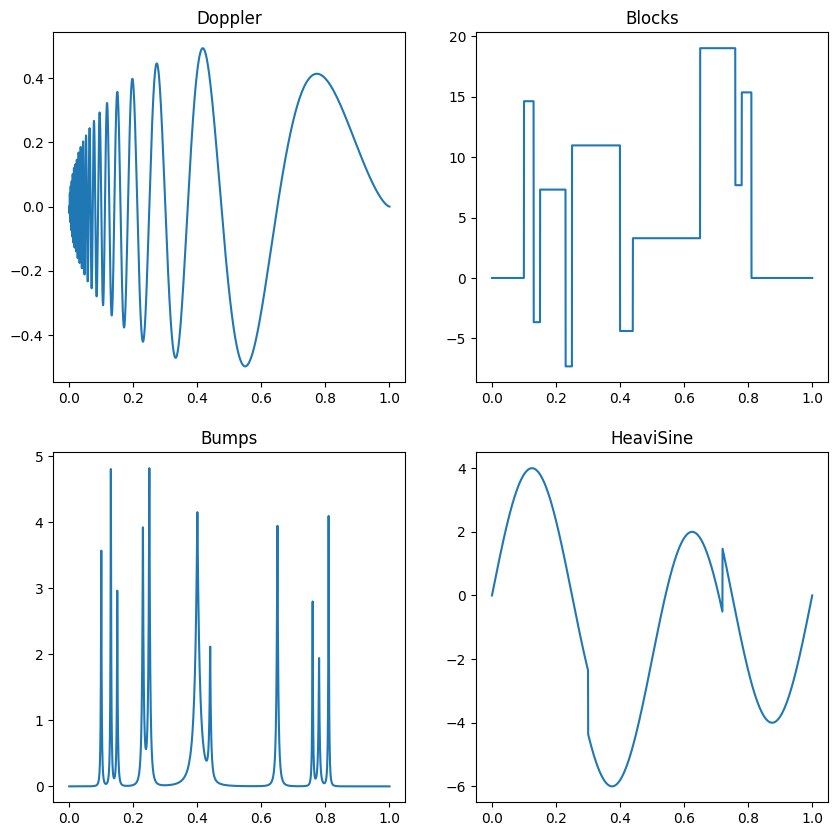

In [27]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))
p1 = axes[0,0]
p2 = axes[0,1]
p3 = axes[1,0]
p4 = axes[1,1]

p1.plot(x,ydop)
p1.set_title("Doppler")

p2.plot(x,yblk)
p2.set_title("Blocks")

p3.plot(x,ybmp)
p3.set_title("Bumps")

p4.set_title("HeaviSine")
p4.plot(x,yhsin)

#
plt.show()

## Addition of noise

We add a Gaussian noise to the signal observed at $2^8=256$ equispaced points on $[0,1]$. From theses noised observations, we will try to recover the initial signals by using wavelet approximations. 

In [28]:
from scipy import stats

np.random.seed(54321)

y_doppler = doppler(np.linspace(0,1,2**8))
yb_doppler = y_doppler+ 0.2*stats.norm().rvs(2**8)


y_blocks = blocks(np.linspace(0,1,2**8))
yb_blocks = y_blocks + stats.norm().rvs(2**8)

y_bumps = bumps(np.linspace(0,1,2**8))
yb_bumps = y_bumps + 0.5*stats.norm().rvs(2**8)

y_heavisine =heavisine(np.linspace(0,1,2**8))
yb_heavisine = y_heavisine + stats.norm().rvs(2**8)



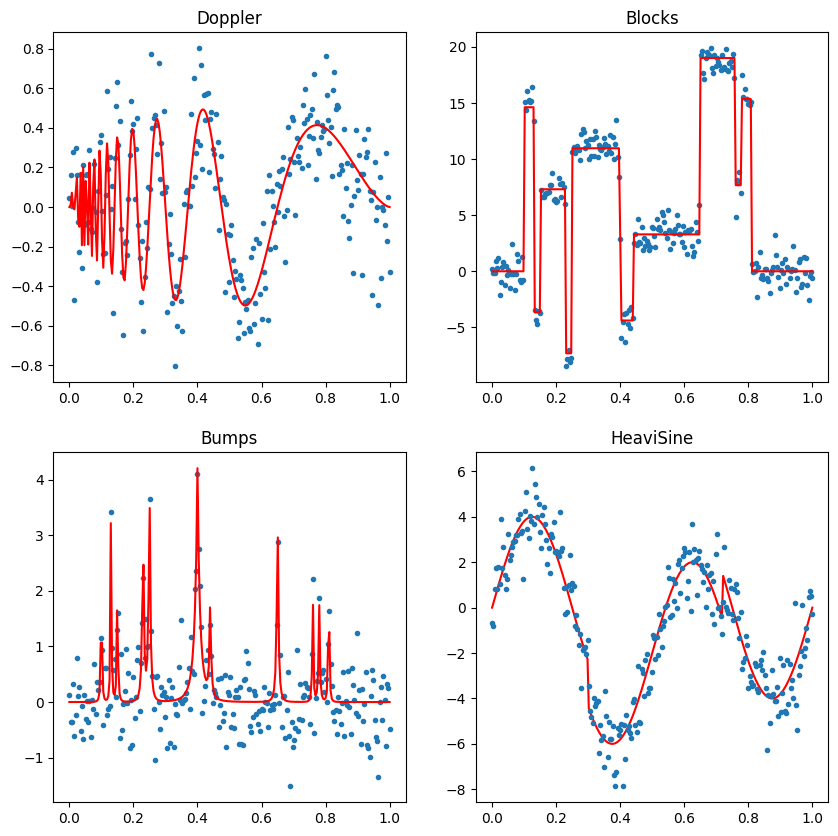

In [29]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))
p1 = axes[0,0]
p2 = axes[0,1]
p3 = axes[1,0]
p4 = axes[1,1]

x = np.linspace(0,1,2**8)
p1.plot(x,yb_doppler,'.')
p1.plot(x,y_doppler,'red')
p1.set_title("Doppler")

p2.plot(x,yb_blocks,'.')
p2.plot(x,y_blocks,'red')
p2.set_title("Blocks")

p3.plot(x,yb_bumps,'.')
p3.plot(x,y_bumps,'red')
p3.set_title("Bumps")

p4.set_title("HeaviSine")
p4.plot(x,y_heavisine,'red')
p4.plot(x,yb_heavisine,'.')

#
plt.show()

## Representation of wavelet coefficients by level:

**The function below allows to represent the wavelet coefficients by level: **

In [30]:
def coef_pyramid_plot(coefs, first=0, scale='uniform', ax=None):
    
    
    """
    Parameters
    ----------
    coefs : array-like
        Wavelet Coefficients. Expects an iterable in order Cdn, Cdn-1, ...,
        Cd1, Cd0.
    first : int, optional
        The first level to plot.
    scale : str {'uniform', 'level'}, optional
        Scale the coefficients using the same scale or independently by
        level.
    ax : Axes, optional
        Matplotlib Axes instance

    Returns
    -------
    Figure : Matplotlib figure instance
        Either the parent figure of `ax` or a new pyplot.Figure instance if
        `ax` is None.
    """

    if ax is None:
        import matplotlib.pyplot as plt
        fig = plt.figure()
        ax = fig.add_subplot(111, facecolor='lightgrey')
    else:
        fig = ax.figure

    n_levels = len(coefs)
    n = 2**(n_levels - 1) # assumes periodic

    if scale == 'uniform':
        biggest = [np.max(np.abs(np.hstack(coefs)))] * n_levels
    else:
        # multiply by 2 so the highest bars only take up .5
        biggest = [np.max(np.abs(i))*2 for i in coefs]

    for i in range(first,n_levels):
        x = np.linspace(2**(n_levels - 2 - i), n - 2**(n_levels - 2 - i), 2**i)
        ymin = n_levels - i - 1 + first
        yheight = coefs[i]/biggest[i]
        ymax = yheight + ymin
        ax.vlines(x, ymin, ymax, linewidth=1.1)

    ax.set_xlim(0,n)
    ax.set_ylim(first - 1, n_levels)
    ax.yaxis.set_ticks(np.arange(n_levels-1,first-1,-1))
    ax.yaxis.set_ticklabels(np.arange(first,n_levels))
    ax.tick_params(top=False, right=False, direction='out', pad=6)
    ax.set_ylabel("Levels", fontsize=14)
    ax.grid(True, alpha=.85, color='white', axis='y', linestyle='-')
    ax.set_title('Wavelet Detail Coefficients', fontsize=16,
            position=(.5,1.05))
    fig.subplots_adjust(top=.89)

    return fig

**Plotting the coefficients of the noisy signals using the coef_pyramid_plot function**

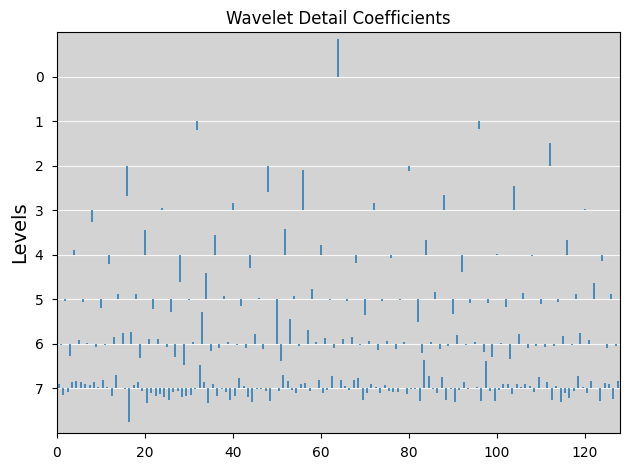

In [31]:
coefs = pywt.wavedec(yb_bumps, 'db1')

fig = coef_pyramid_plot(coefs[1:]) ;
plt.title("Wavelet Detail Coefficients");

fig.tight_layout()

plt.show()


**Q.** Interpret this representation. 

## Linear approximation: 

** Linear approximation of the function blocks **: one keeps the approximation coefficients at a certain level, one cancels the detail coefficients  of higher levels. This corresponds to the following decomposition:
 
 $$ \hat{f}(x)=\sum_{ k \in \Lambda( j_0)} \hat{\alpha}_{j_0,k}\phi_{j_0,k} .$$
 
 -----------------------------------------------------------------------------------------

** Approximation linéaire de la fonction blocks ** : on garde les coefficients d'approximation à un certain niveau, on annule les coefficients de détails de niveaux supérieurs. Ceci correspond à la décomposition suivante : 
 
 $$ \hat{f}(x)=\sum_{ k \in \Lambda( j_0)} \hat{\alpha}_{j_0,k}\phi_{j_0,k} .$$



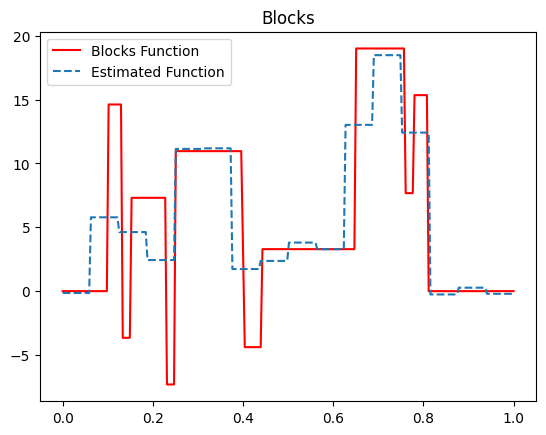

In [32]:
from pywt import wavedec

coeffs = wavedec(yb_blocks, 'db1', level=4)

cA4, cD4, cD3, cD2 , cD1 = coeffs

cD4=np.zeros(len(cD4))
cD3=np.zeros(len(cD3))
cD2=np.zeros(len(cD2))
cD1=np.zeros(len(cD1))

coeff_lin4= cA4, cD4, cD3, cD2 , cD1 

blocks_rec=pywt.waverec(coeff_lin4, 'db1')

x = np.linspace(0,1,2**8)

plt.plot(x,y_blocks,'red',label="Blocks Function")
plt.plot(x,blocks_rec,'--',label="Estimated Function")
plt.title("Blocks")
plt.legend()
plt.show()

**Q.**  Does the approximation seem good to you? How many coefficients have we kept?

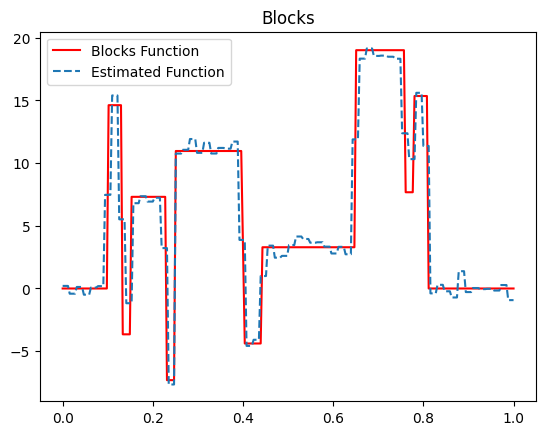

Number of non-zero coefficients  = 


(None, 64)

In [33]:
from pywt import wavedec

coeffs = wavedec(yb_blocks, 'db1', level=2)

cA2, cD2 , cD1 = coeffs

cD2=np.zeros(len(cD2))
cD1=np.zeros(len(cD1))

coeff_lin2= cA2, cD2 , cD1 

blocks_rec=pywt.waverec(coeff_lin2, 'db1')

x = np.linspace(0,1,2**8)

plt.plot(x,y_blocks,'red',label="Blocks Function")
plt.plot(x,blocks_rec,'--',label="Estimated Function")
plt.title("Blocks")
plt.legend()
plt.show()

#Number of non-zero coefficients  : 
nbcoef=sum(cA2!=0)+sum(cD2!=0)+sum(cD1!=0)
print ('Number of non-zero coefficients  = '), nbcoef

**Q.**  What is the difference with the previous decomposition ? 


## Non linear approximation with thresholding 

**We see that it is preferable to consider a nonlinear approximation by thresholding in order to have a good quality of approximation with less coefficients**

- First of all using the single level decomposition
- Then using the more suitable multilevel decomposition.

-------------------------------------------------------

**On voit qu'il est préférable de considérer une approximation non linéaire par seuillage afin d'avoir une bonne qualité d'approximation avec moins de coefficients**

- Tout d'abord en utilisant la décomposition single level 
- Puis en utilisant la décomposition multilevel plus adaptée. 

In [34]:
(cA, cD) = pywt.dwt(yb_blocks, 'db1')

#print(cA)
#print(cD)

sigma=1
# Computation of the threshold 
thresh = sigma*np.sqrt(2*np.log(len(yb_blocks)))

# Only the detail coefficients are thresholded

cDth=pywt.threshold(cD, thresh, 'hard')

#print(cDth)



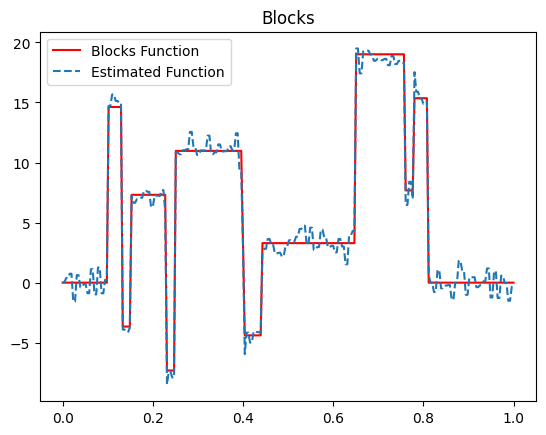

In [35]:
# Reconstruction
yb_blocks_rec= pywt.upcoef('a', cA, 'db1') + pywt.upcoef('d', cDth, 'db1')

x = np.linspace(0,1,2**8)

plt.plot(x,y_blocks,'red',label="Blocks Function")
plt.plot(x,yb_blocks_rec,'--',label="Estimated Function")
plt.title("Blocks")
plt.legend()
plt.show()

We see that the reconstruction is still too noisy.This comes from the fact that only the highest level of detail coefficients have been thresholded. We will use the multilevel wavelet decomposition to be able to threshold  more detail coefficients.

------------------------------------

On voit que la reconstruction est encore beaucoup trop bruitée. 
Cela vient du fait que l'on a seuillé que les coefficients de détail de niveau le plus élevé. 
Nous allons utiliser la décomposition en ondelette multiniveau pour pouvoir seuiller beaucoup plus de coefficients de détail. 

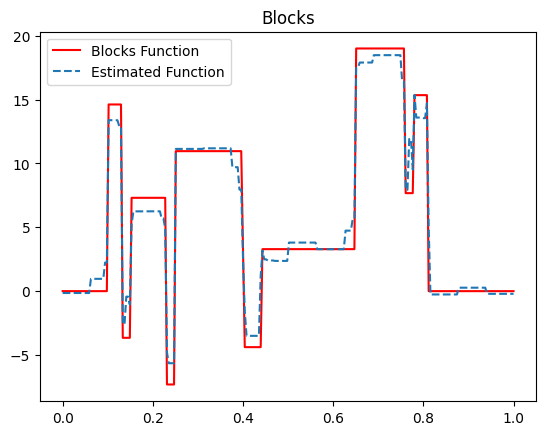

Number of non-zero coefficients  = 


(None, 29)

In [36]:
from pywt import wavedec

coeffs = wavedec(yb_blocks, 'db1', level=4)
cA4, cD4, cD3, cD2 , cD1 = coeffs

sigma=1
# Calcul du seuil 
thresh = sigma*np.sqrt(2*np.log(len(yb_blocks)))

cD4th=pywt.threshold(cD4, thresh, 'soft')
cD3th=pywt.threshold(cD3, thresh, 'soft')
cD2th=pywt.threshold(cD2, thresh, 'soft')
cD1th=pywt.threshold(cD1, thresh, 'soft')

coeffsth= cA4, cD4th, cD3th, cD2th , cD1th
blocks_rec=pywt.waverec(coeffsth, 'db1')


x = np.linspace(0,1,2**8)

plt.plot(x,y_blocks,'red',label="Blocks Function")
plt.plot(x,blocks_rec,'--',label="Estimated Function")
plt.title("Blocks")
plt.legend()
plt.show()

#Reconstruction correcte 
#Nombre de coefficients non nuls : 
nbcoef=sum(cD4th!=0)+sum(cD3th!=0)+sum(cD2th!=0)+sum(cD1th!=0)
print ('Number of non-zero coefficients  = '), nbcoef

**Q.** What do you conclude from this last method ? 